<a href="https://colab.research.google.com/github/miteshpatel2311/statistics-topics-used-daily-by-data-scientists/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **3 Sigma Techniques (standersd devation)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd

data = pd.read_csv('/content/raw_sales2.csv')
data.head()


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [15]:
type(data)

pandas.core.frame.DataFrame

In [16]:
# Function to detect the Outliers on one dimension data
def find_anomalies(data):
    anomalies = []

    std_dev = statistics.stdev(data)
    std_mean = statistics.mean(data)
    anomaly_cut_off = std_dev * 3

    lower_limit = std_mean - anomaly_cut_off
    upper_limit = std_mean + anomaly_cut_off

    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [18]:
data.price

,price
0,525000
1,290000
2,328000
3,380000
4,310000
...,...
29575,500000
29576,560000
29577,464950
29578,589000


In [20]:
list_1 = find_anomalies(data['price'])

In [21]:
len(list_1)

461

In [22]:
len(data)

29580

In [23]:
data.price.skew()

np.float64(4.312009366902366)

<Axes: xlabel='price', ylabel='Density'>

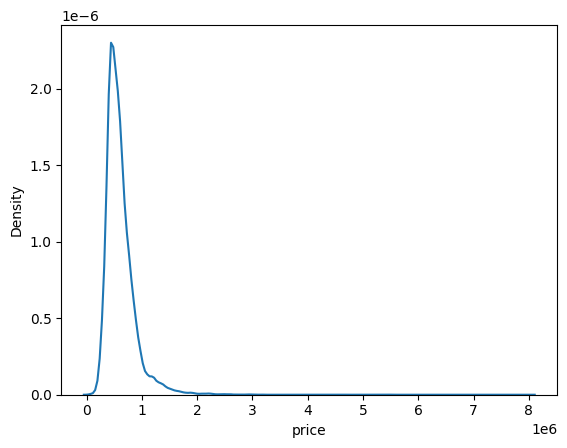

In [27]:
import seaborn as sns

sns.kdeplot(data['price'])

In [29]:
data['price_transfomed'] = np.log(data['price'])

In [30]:
data.price_transfomed.skew()

np.float64(0.4731646269984763)

In [31]:
list_2 = find_anomalies(data['price_transfomed'])

In [32]:
len(list_2)

266

<Axes: xlabel='price_transfomed', ylabel='Density'>

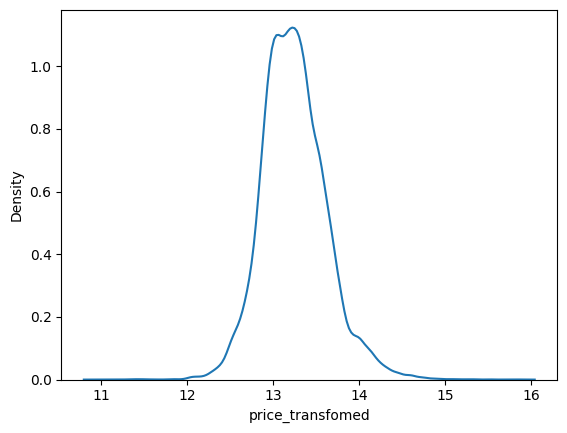

In [33]:
sns.kdeplot(data['price_transfomed'])

In [34]:
data['price_transfomed_double'] = np.log(data['price_transfomed'])

In [35]:
find_3 = find_anomalies(data['price_transfomed_double'])

In [36]:
len(find_3)

251

any thing below 40 and above 80 are consider as outliers